<a href="https://colab.research.google.com/github/JLopez86/plant_disease/blob/main/03_Red_Neuronal_Convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3. Red Neuronal Convolucional

##3.1. Instalación de Requerimientos

In [1]:
# Actualización de Matplotlib
! pip install matplotlib --upgrade
# Instalación del cliente Neptune
! pip install neptune-client[fastai]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 42.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.7/439.7 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 KB 48.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140

In [1]:
# Importación de librerías
from google.colab import files
from google.colab import drive
from fastai.vision.all import *
from fastai.callback.hook import *
from fastai.imports import *
from fastai.torch_core import *
from fastai.learner import *   
import os
import shutil
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib: {}'.format(matplotlib.__version__))

#from fastai.optimizer import OptimWrapper
from torch import optim
from functools import partial
import pandas as pd

# Importación de librerías para integración Fastai | Neptune
import neptune.new as neptune
from neptune.new.integrations.fastai import NeptuneCallback


# Verificación de activación de GPU
print(torch.cuda.is_available())

matplotlib: 3.6.3
True


In [2]:
# Montar el drive y extraer el conjunto de datos
drive.mount('/content/drive')
# Descomprimir imágenes para entrenamiento y validación
! unzip /content/drive/MyDrive/Colab\ Notebooks/DPI\ -\ Anomalias\ en\ Hojas/Plant_Disease.zip
# Descomprimir imágenes para pruebas
! unzip /content/drive/MyDrive/Colab\ Notebooks/DPI\ -\ Anomalias\ en\ Hojas/Validation.zip

Mounted at /content/drive
Archive:  /content/drive/MyDrive/Colab Notebooks/DPI - Anomalias en Hojas/Plant_Disease.zip
   creating: Plant_Disease/
   creating: Plant_Disease/Healthy/
  inflating: Plant_Disease/Healthy/94b531898979f38b.jpg  
  inflating: Plant_Disease/Healthy/97f3cad16524509b.jpg  
  inflating: Plant_Disease/Healthy/83f7381b7cace01c.jpg  
  inflating: Plant_Disease/Healthy/86c8358db7d560ad.jpg  
  inflating: Plant_Disease/Healthy/8e6a823cce9ff40c.jpg  
  inflating: Plant_Disease/Healthy/85edd994308a6f65.jpg  
  inflating: Plant_Disease/Healthy/84f60a857fb26bc1.jpg  
  inflating: Plant_Disease/Healthy/818a15d52bb75f0e.jpg  
  inflating: Plant_Disease/Healthy/9f2174f703ca3961.jpg  
  inflating: Plant_Disease/Healthy/88d8c872ceb7a2b6.jpg  
  inflating: Plant_Disease/Healthy/90c790666f674f58.jpg  
  inflating: Plant_Disease/Healthy/93a7c1dd2fe04f20.jpg  
  inflating: Plant_Disease/Healthy/98d2ed0b33c866d9.jpg  
  inflating: Plant_Disease/Healthy/8bda74e18b458f0d.jpg  
  infl

##3.2. Definición del Conjunto de Datos

In [3]:
# Cargar el conjunto de datos en memoria
path = 'Plant_Disease'
files = get_image_files(path)

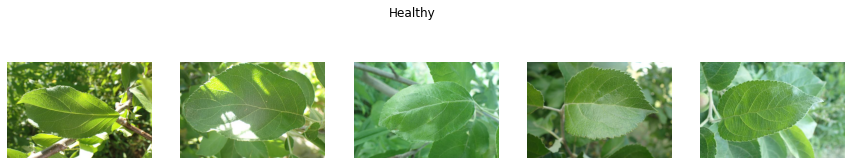

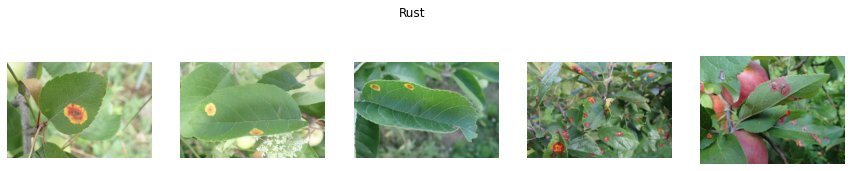

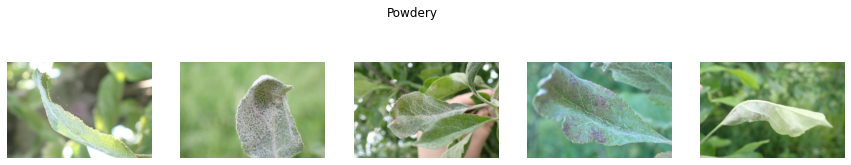

In [4]:
# Etiquetas del dataset y visualización de las muestras
labels = os.listdir(path)
dataset = {}
for label in labels:
  images = get_image_files(path, folders=label)
  dataset[label] =len(images)
  sample = [load_image(image) for image in images.shuffle()[:5]]
  show_images(sample, nrows=1, ncols=5, imsize=3, suptitle=label)

In [22]:
def random_seed(seed_value, use_cuda):
    np.random.seed(seed_value) # cpu vars
    torch.manual_seed(seed_value) # cpu  vars
    random.seed(seed_value) # Python
    if use_cuda: 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False


# Función para la definición del dataloader
def get_dataloader(bs = 64, size=256, val=0.20, mult=1, seed = 42, cuda = False): 
  print(f"* Cargando imágenes desde {path}:")
  print(f"    Se usará {len(labels)} etiquetas: {labels}")
  print(f"    Se reservó {1-val:.0%} de los datos para el entrenamiento")
  dataloader = ImageDataLoaders.from_folder(
  path, 
  vocab=labels, 
  item_tfms=Resize(size),
  valid_pct=val, 
  batch_tfms=aug_transforms(mult=mult),
  bs = bs,
  seed = random_seed(seed_value = seed, use_cuda = cuda)
  )
  return dataloader

dataloader = get_dataloader(val=0.20, seed = 45, cuda = True)

* Cargando imágenes desde Plant_Disease:
    Se usará 3 etiquetas: ['Healthy', 'Rust', 'Powdery']
    Se reservó 80% de los datos para el entrenamiento


In [23]:
# Verificación de la distribución de imágenes por etiquetas para entrenamiento y validación
plot_labels = []
plot_train_imgs = []
plot_valid_imgs = []
for label in labels:
  num_train_imgs = len([path for path in dataloader.train_ds.items if path.parent.name == label])
  num_valid_imgs = len([path for path in dataloader.valid_ds.items if path.parent.name == label])
  plot_labels.append(label)
  plot_train_imgs.append(num_train_imgs)
  plot_valid_imgs.append(num_valid_imgs)
  print(f"* Para '{label}...'")
  print(f"    Se tiene {num_train_imgs} imágenes de entrenamiento")
  print(f"    Se tiene {num_valid_imgs} imágenes de validación")

* Para 'Healthy...'
    Se tiene 402 imágenes de entrenamiento
    Se tiene 106 imágenes de validación
* Para 'Rust...'
    Se tiene 387 imágenes de entrenamiento
    Se tiene 97 imágenes de validación
* Para 'Powdery...'
    Se tiene 389 imágenes de entrenamiento
    Se tiene 91 imágenes de validación


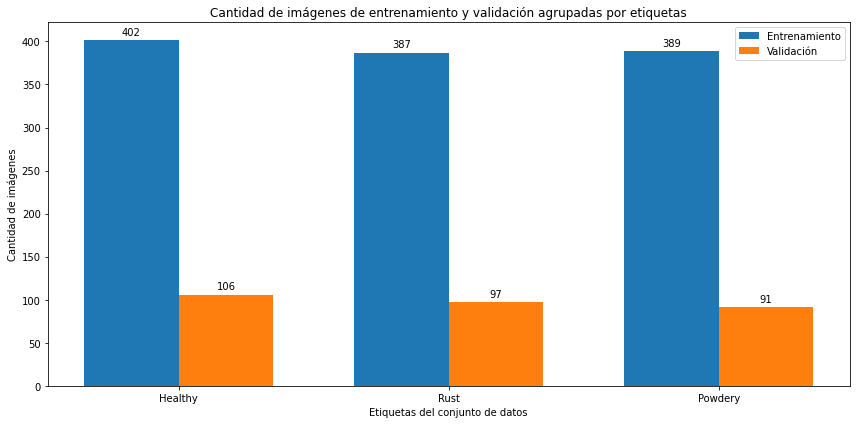

In [24]:
# Graficar la distribución de imágenes por entrenamiento y validación
x = np.arange(len(plot_labels)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, plot_train_imgs, width, label='Entrenamiento')
rects2 = ax.bar(x + width/2, plot_valid_imgs, width, label='Validación')

ax.set_ylabel('Cantidad de imágenes')
ax.set_xlabel('Etiquetas del conjunto de datos')
ax.set_title('Cantidad de imágenes de entrenamiento y validación agrupadas por etiquetas')
ax.set_xticks(x, plot_labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

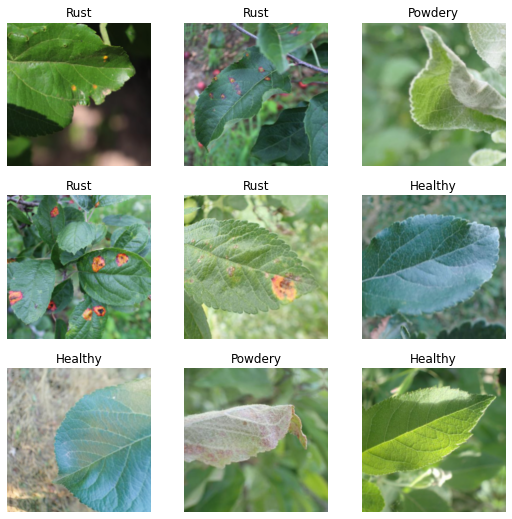

In [25]:
dataloader.show_batch()

##4.3. Modelo de Rede Neuronal Convolucional

###4.3.1 Definición del modelo e hyperparamentros

In [26]:
# Definición inicial de Hyperparametros
epochs = 1
bs = 32
lr = 0.1

In [30]:
# Función para la convolución
def conv(ni, nf, ks=3, st = 2, act=True):
    layers = [nn.Conv2d(ni, nf, stride=st, kernel_size=ks, padding=ks//2)]
    if act: layers.append(nn.ReLU())
    layers.append(nn.BatchNorm2d(nf))
    return nn.Sequential(*layers)

# Definición del modelo CNN
def simple_cnn():
    return sequential(
        conv(3 ,8, ks=3),        
        conv(8 ,16),             
        conv(16,32),             
        conv(32,64),
        conv(64,32),   
        conv(32,16),
        conv(16,8),           
        conv(8,3, act=False),  
        Flatten(),
    )

# Definición del learner
def set_learner(**kwargs):
  return Learner(dls=dataloader,
                 model=simple_cnn(),
                 metrics=[accuracy, error_rate],
                 path='/content/',
                 model_dir='models',
                 loss_func=CrossEntropyLossFlat(),
                 cbs=ActivationStats(with_hist=True),
                 **kwargs
                 )
  
# Configuración inicial del learner
learner = set_learner()

# Función de entrenamiento 
def fit_model(learner, epochs=epochs, lr=lr):
  return learner.fit(epochs, lr, cbs=[ActivationStats(with_hist=True), CSVLogger])


def fit_cycle(learner, epochs=epochs, lr=lr, monitor='accuracy', patience=3):
  return learner.fit_one_cycle(epochs, lr, 
                               cbs=[EarlyStoppingCallback(monitor=monitor, min_delta=0.01, patience=patience), 
                                    SaveModelCallback(monitor=monitor, min_delta=0.01),
                                    ActivationStats(with_hist=True)])
  
def fit_one_cycle(learner, epochs=epochs, lr=lr, monitor='accuracy', patience=3):
  return learner.fit_one_cycle(epochs, lr, 
                               cbs=[neptune_callback, EarlyStoppingCallback(monitor=monitor, min_delta=0.01, patience=patience), 
                                    SaveModelCallback(monitor=monitor, min_delta=0.01)])
  
# Función para graficar las metricas de pérdida de entrenamiento y validación, precisión y error en la validación
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

In [28]:
# Resumen del modelo
learner.summary()

Sequential (Input shape: 64 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 8 x 128 x 128  
Conv2d                                    224        True      
ReLU                                                           
BatchNorm2d                               16         True      
____________________________________________________________________________
                     64 x 16 x 64 x 64   
Conv2d                                    1168       True      
ReLU                                                           
BatchNorm2d                               32         True      
____________________________________________________________________________
                     64 x 32 x 32 x 32   
Conv2d                                    4640       True      
ReLU                                                           
BatchNorm2d                               64         True      
___________________________________

###4.3.2 Proceso de entrenamiento y optimización

####4.3.2.1 Optimizador SGD

Decimal: 0.019054606556892395
Notación Científica: 1.9e-2


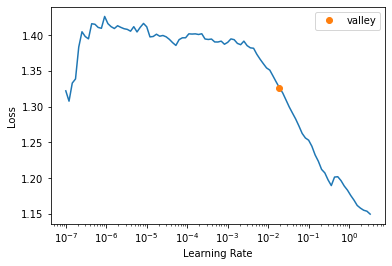

In [ ]:
# Configuración inicial del learner
learner_SGD = set_learner(opt_func=SGD)

# Taza de aprendizaje con SGD
lr_SGD = learner_SGD.lr_find()
print(f"Decimal: {lr_SGD[0]}")
print(f"Notación Científica: {np.format_float_scientific(lr_SGD[0], precision = 1, exp_digits=1)}")

In [ ]:
# Entrenamiento del modelo
fit_model(learner_SGD, epochs = 3, lr=lr_SGD[0])

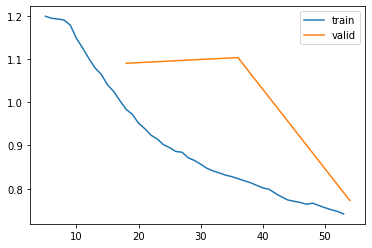

In [ ]:
# Graficar la pérdida para los datos entrenamiento y validación
learner_SGD.recorder.plot_loss()

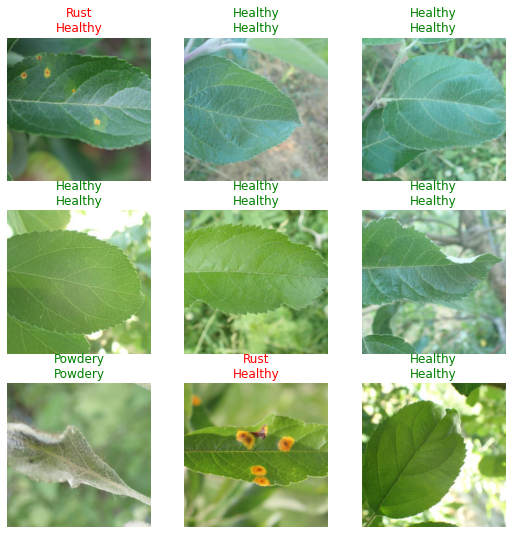

In [ ]:
# Resultados del entrenamiento
learner_SGD.show_results()

In [ ]:
# Entrenamiento de un ciclo
fit_cycle(learner_SGD, epochs = 15, lr=lr_SGD[0], monitor='valid_loss', patience= 5)

Better model found at epoch 0 with valid_loss value: 0.4798257648944855.
Better model found at epoch 5 with valid_loss value: 0.37130632996559143.
Better model found at epoch 7 with valid_loss value: 0.3072255849838257.
Better model found at epoch 12 with valid_loss value: 0.28852933645248413.


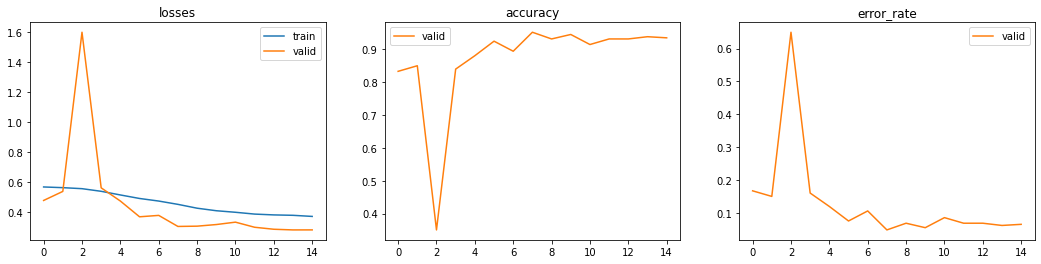

In [ ]:
# Graficar la pérdida para los datos entrenamiento y validación y la precisión con datos de validación 
learner_SGD.recorder.plot_metrics()

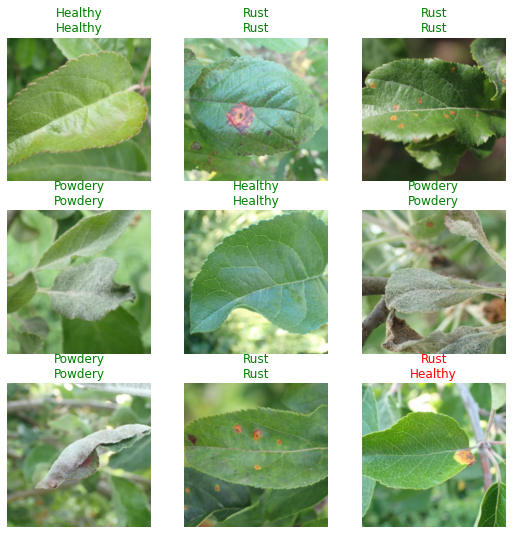

In [ ]:
# Resultados del entrenamiento
learner_SGD.show_results()

In [ ]:
# Exportar FastAI learner con optimizador SGD
learner_SGD.export('/content/models/model_SGD.pkl')

####4.3.2.2 Optimizador Adam

/usr/local/lib/python3.8/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


Decimal: 0.0063095735386013985
Notación Científica: 6.3e-3


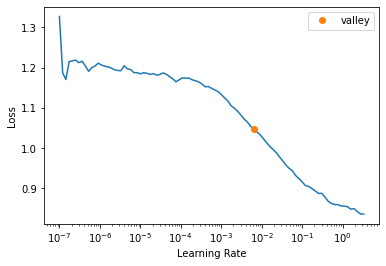

In [ ]:
# Configuración inicial del learner
learner_Adam = set_learner(opt_func=Adam)

# Buscando el learning rate óptimo
lr_adam = learner_Adam.lr_find()
print(f"Decimal: {lr_adam[0]}")
print(f"Notación Científica: {np.format_float_scientific(lr_adam[0], precision = 1, exp_digits=1)}")

In [ ]:
# Entrenamiento del modelo
fit_model(learner_Adam, epochs = 3, lr=lr_adam[0])

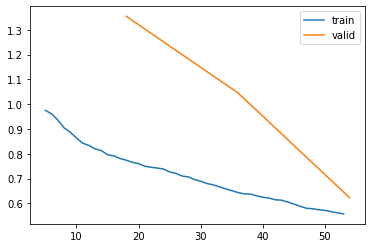

In [ ]:
# Graficar la pérdida para los datos entrenamiento y validación
learner_Adam.recorder.plot_loss()

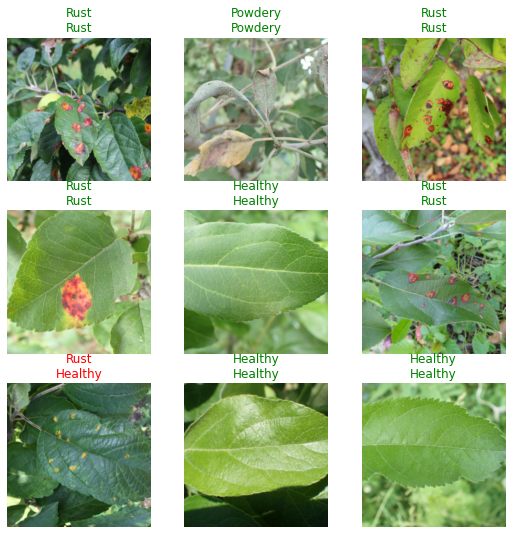

In [ ]:
# Resultados del entrenamiento
learner_Adam.show_results()

In [ ]:
# Entrenamiento de un ciclo
fit_cycle(learner_Adam, epochs = 15, lr = lr_adam, monitor='valid_loss', patience= 5)

Better model found at epoch 0 with valid_loss value: 0.3916916251182556.
Better model found at epoch 3 with valid_loss value: 0.30486688017845154.
Better model found at epoch 6 with valid_loss value: 0.2750803232192993.
Better model found at epoch 9 with valid_loss value: 0.2463902086019516.
Better model found at epoch 10 with valid_loss value: 0.1590096801519394.


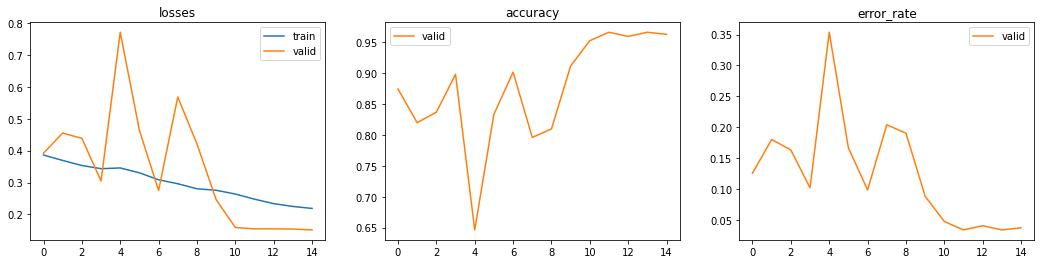

In [ ]:
# Graficar la pérdida para los datos entrenamiento y validación
learner_Adam.recorder.plot_metrics()

In [ ]:
# Exportar FastAI learner con optimizador Adam
learner_Adam.export('/content/models/model_Adam.pkl')

####4.3.2.3 Optimizador RMSProp

/usr/local/lib/python3.8/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


Decimal: 0.00363078061491251
Notación Científica: 3.6e-3


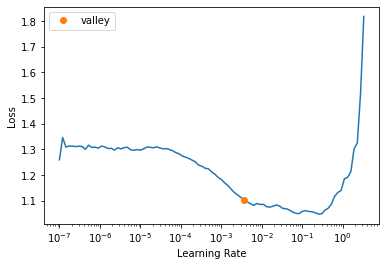

In [ ]:
# Configuración inicial del learner
learner_RMS = set_learner(opt_func=RMSProp)

# Buscando el learning rate óptimo
lr_rms = learner_RMS.lr_find()
print(f"Decimal: {lr_rms[0]}")
print(f"Notación Científica: {np.format_float_scientific(lr_rms[0], precision = 1, exp_digits=1)}")

In [ ]:
# Entrenamiento del modelo
fit_model(learner_RMS, epochs = 3, lr=lr_rms[0])

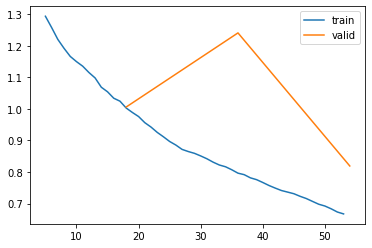

In [ ]:
# Graficar la pérdida para los datos entrenamiento y validación
learner_RMS.recorder.plot_loss()

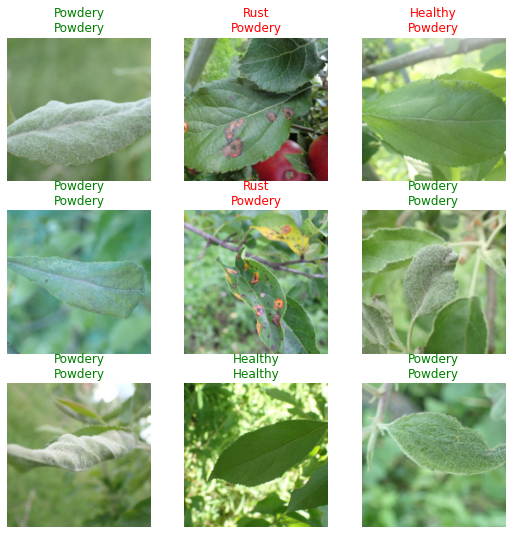

In [ ]:
# Resultados del entrenamiento
learner_RMS.show_results()

In [ ]:
# Entrenamiento de un ciclo
fit_cycle(learner_RMS, epochs = 15, lr = lr_adam, monitor='valid_loss', patience= 5)

Better model found at epoch 0 with valid_loss value: 0.4391689598560333.
Better model found at epoch 4 with valid_loss value: 0.2457311451435089.
Better model found at epoch 5 with valid_loss value: 0.23503820598125458.
Better model found at epoch 7 with valid_loss value: 0.21375107765197754.
Better model found at epoch 9 with valid_loss value: 0.18286341428756714.
Better model found at epoch 10 with valid_loss value: 0.16389693319797516.
Better model found at epoch 12 with valid_loss value: 0.14712275564670563.


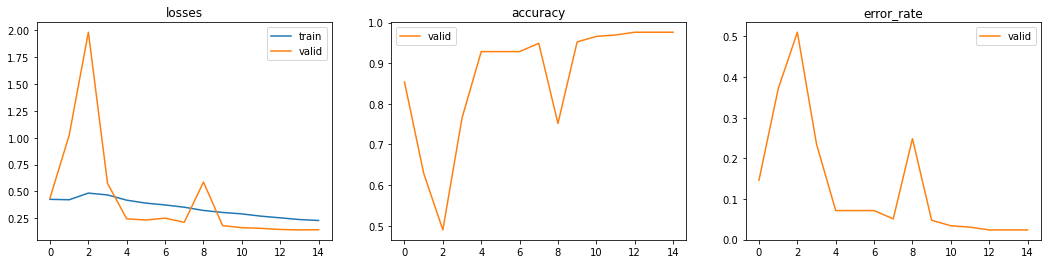

In [ ]:
# Graficar la pérdida para los datos entrenamiento y validación
learner_RMS.recorder.plot_metrics()

In [ ]:
# Exportar FastAI learner con optimizador Adam
learner_RMS.export('/content/models/model_rms.pkl')

###4.3.3 Entrenamiento, registro y evaluación de resultados de entrenamiento

In [32]:
# Definición de hyperparametros
epochs = 20
batch_size = [32, 64]
optimizers = [SGD, Adam, RMSProp]
learners = []

* Cargando imágenes desde Plant_Disease:
    Se usará 3 etiquetas: ['Healthy', 'Rust', 'Powdery']
    Se reservó 80% de los datos para el entrenamiento
https://app.neptune.ai/jlopez.tics/Plants-Disease-CNN/e/PDCNN-7
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


/usr/local/lib/python3.8/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


Better model found at epoch 0 with valid_loss value: 1.0731770992279053.
Better model found at epoch 1 with valid_loss value: 1.0018376111984253.
Better model found at epoch 4 with valid_loss value: 0.7639808654785156.
Better model found at epoch 5 with valid_loss value: 0.7204163670539856.
Better model found at epoch 6 with valid_loss value: 0.6331854462623596.
Better model found at epoch 7 with valid_loss value: 0.42563673853874207.
Better model found at epoch 8 with valid_loss value: 0.33763039112091064.
Better model found at epoch 11 with valid_loss value: 0.28161534667015076.
Better model found at epoch 12 with valid_loss value: 0.2639836370944977.
Better model found at epoch 13 with valid_loss value: 0.2514480650424957.
Better model found at epoch 14 with valid_loss value: 0.2305009812116623.
Better model found at epoch 16 with valid_loss value: 0.21862876415252686.
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 46 operations to synchronize

/usr/local/lib/python3.8/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


Better model found at epoch 0 with valid_loss value: 0.866999626159668.
Better model found at epoch 1 with valid_loss value: 0.7772084474563599.
Better model found at epoch 2 with valid_loss value: 0.7280388474464417.
Better model found at epoch 3 with valid_loss value: 0.5810966491699219.
Better model found at epoch 4 with valid_loss value: 0.4739306569099426.
Better model found at epoch 5 with valid_loss value: 0.33959776163101196.
Better model found at epoch 6 with valid_loss value: 0.28778353333473206.
Better model found at epoch 8 with valid_loss value: 0.21801070868968964.
Better model found at epoch 10 with valid_loss value: 0.15991441905498505.
Better model found at epoch 13 with valid_loss value: 0.14447574317455292.
Better model found at epoch 14 with valid_loss value: 0.12931405007839203.
Better model found at epoch 17 with valid_loss value: 0.11103270947933197.
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 31 operations to synchroniz

/usr/local/lib/python3.8/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


Better model found at epoch 0 with valid_loss value: 1.0384175777435303.
Better model found at epoch 1 with valid_loss value: 0.8548014760017395.
Better model found at epoch 2 with valid_loss value: 0.4475628137588501.
Better model found at epoch 5 with valid_loss value: 0.2893296778202057.
Better model found at epoch 9 with valid_loss value: 0.2483222335577011.
Better model found at epoch 11 with valid_loss value: 0.17397373914718628.
Better model found at epoch 16 with valid_loss value: 0.136086106300354.
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 10 operations to synchronize with Neptune. Do not kill this process.
All 10 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/jlopez.tics/Plants-Disease-CNN/e/PDCNN-9
* Cargando imágenes desde Plant_Disease:
    Se usará 3 etiquetas: ['Healthy', 'Rust', 'Powdery']
    Se reservó 80% de los datos para el entrenamiento
https://app.neptune.ai/jlope

/usr/local/lib/python3.8/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


Better model found at epoch 0 with valid_loss value: 1.105635404586792.
Better model found at epoch 1 with valid_loss value: 0.9317784905433655.
Better model found at epoch 2 with valid_loss value: 0.6076546907424927.
Better model found at epoch 5 with valid_loss value: 0.4626603424549103.
Better model found at epoch 6 with valid_loss value: 0.3699636459350586.
Better model found at epoch 8 with valid_loss value: 0.3475360572338104.
Better model found at epoch 11 with valid_loss value: 0.2960960865020752.
Better model found at epoch 12 with valid_loss value: 0.26376909017562866.
Better model found at epoch 13 with valid_loss value: 0.2274632304906845.
Better model found at epoch 17 with valid_loss value: 0.2115885615348816.
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 17 operations to synchronize with Neptune. Do not kill this process.
All 17 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/

/usr/local/lib/python3.8/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


Better model found at epoch 0 with valid_loss value: 1.1030871868133545.
Better model found at epoch 1 with valid_loss value: 0.9281966090202332.
Better model found at epoch 2 with valid_loss value: 0.8367924690246582.
Better model found at epoch 6 with valid_loss value: 0.7345300316810608.
Better model found at epoch 9 with valid_loss value: 0.20511075854301453.
Better model found at epoch 13 with valid_loss value: 0.17509183287620544.
Better model found at epoch 14 with valid_loss value: 0.15456460416316986.
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 14 operations to synchronize with Neptune. Do not kill this process.
All 14 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/jlopez.tics/Plants-Disease-CNN/e/PDCNN-11
https://app.neptune.ai/jlopez.tics/Plants-Disease-CNN/e/PDCNN-12
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api/run#stop). It

/usr/local/lib/python3.8/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


Better model found at epoch 0 with valid_loss value: 1.088550090789795.
Better model found at epoch 3 with valid_loss value: 0.6301568746566772.
Better model found at epoch 7 with valid_loss value: 0.31708258390426636.
Better model found at epoch 9 with valid_loss value: 0.261457622051239.
Better model found at epoch 13 with valid_loss value: 0.2004808932542801.
Better model found at epoch 15 with valid_loss value: 0.17989201843738556.
Better model found at epoch 18 with valid_loss value: 0.16196556389331818.
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 16 operations to synchronize with Neptune. Do not kill this process.
All 16 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/jlopez.tics/Plants-Disease-CNN/e/PDCNN-12


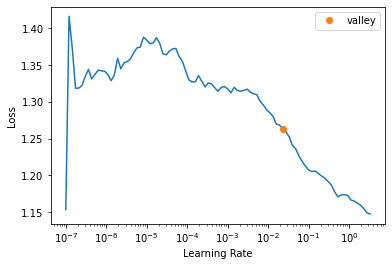

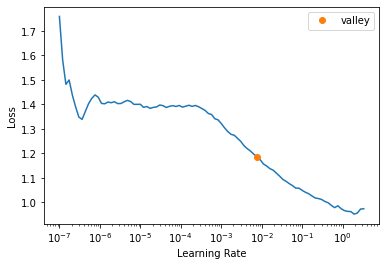

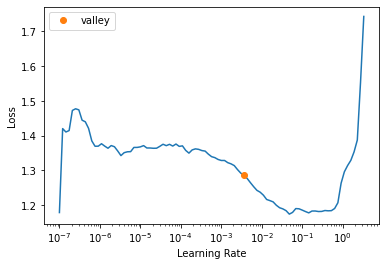

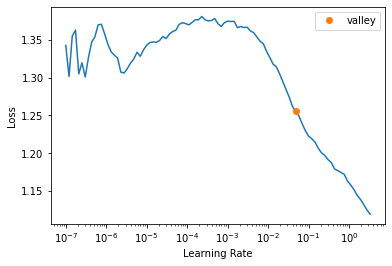

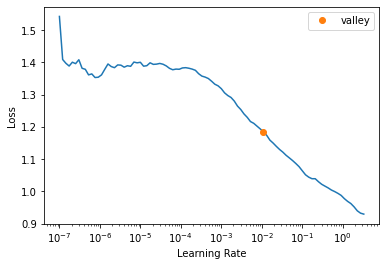

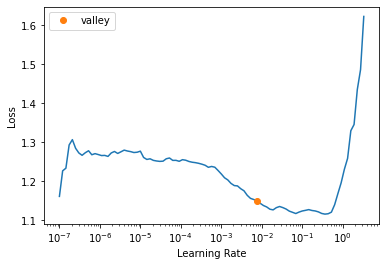

In [33]:
# Entrenamiento del modelo y registro en Neptune

for bs in batch_size: 
  dataloader = get_dataloader(bs = bs)
  for opt in optimizers:
    run = neptune.init_run(
        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI4ODA3ZGE2OC0wNzI4LTRlYjMtYjQ2YS0xZDk1NTVjNmY2OTMifQ==",
        project="jlopez.tics/Plants-Disease-CNN")
    neptune_callback = NeptuneCallback(run=run)
    learner_opt = set_learner(opt_func=opt)
    learner_opt.summary()
    lr_opt = learner_opt.lr_find()
    fit_one_cycle(learner_opt, epochs = epochs, lr = lr_opt[0], monitor='valid_loss', patience=10)
    learner_opt.export(f'/content/models/model_{str(bs)}_{str(opt)}.pkl')
    learners.append(learner_opt)
    run.stop()

<b>Hiperparametros utilizados y metricas obtenidas</b>
<br><br>
<img src="https://raw.githubusercontent.com/JLopez86/plant_disease/main/00-IMG/metricas_cnn.png" alt="Hiperparametros CNN"/>
<br>
(*) Gráfico de [Neptune.ia](https://app.neptune.ai/jlopez.tics/Plants-Disease/experiments?compare=auto&split=cmp&dash=parallel-coordinates-plot&viewId=983ae598-e5c4-470f-a5e5-dbc3c8fb2dd2) | [Mayor resolución](https://raw.githubusercontent.com/JLopez86/plant_disease/main/00-IMG/metricas_cnn.png)

##3.4. Interpretación de Resultados

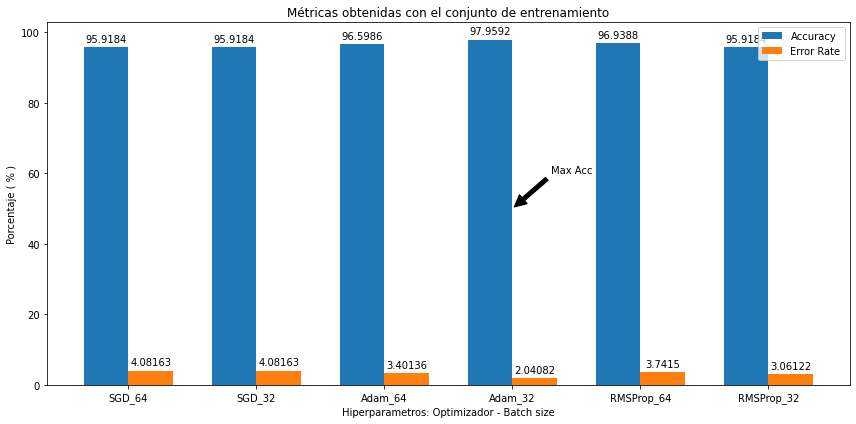

In [41]:
labels = ['SGD_64', 'SGD_32', 'Adam_64', 'Adam_32', 'RMSProp_64', 'RMSProp_32']
acc_last = [0.959184*100, 0.959184*100, 0.965986*100, 0.979592*100, 0.969388*100, 0.959184*100]
err_rate = [00.0408163*100, 0.0408163*100, 0.0340136*100, 0.0204082*100, 0.037415*100, 0.0306122*100]
width = 0.35

x = np.arange(len(labels)) 
fig, ax = plt.subplots(figsize=(12,6))

rects1 = ax.bar(x - width/2, acc_last, width, label='Accuracy')
rects2 = ax.bar(x + width/2, err_rate, width, label='Error Rate')

ax.set_ylabel('Porcentaje ( % )')
ax.set_xlabel('Hiperparametros: Optimizador - Batch size')
ax.set_title('Métricas obtenidas con el conjunto de entrenamiento')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

ax.annotate('Max Acc', xy=(3, 50), xytext=(3.3, 60),
            arrowprops=dict(facecolor='black', shrink=0.05),)


fig.tight_layout()
plt.show()

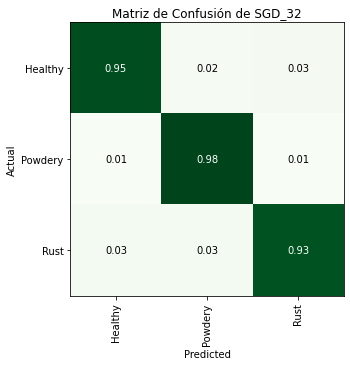

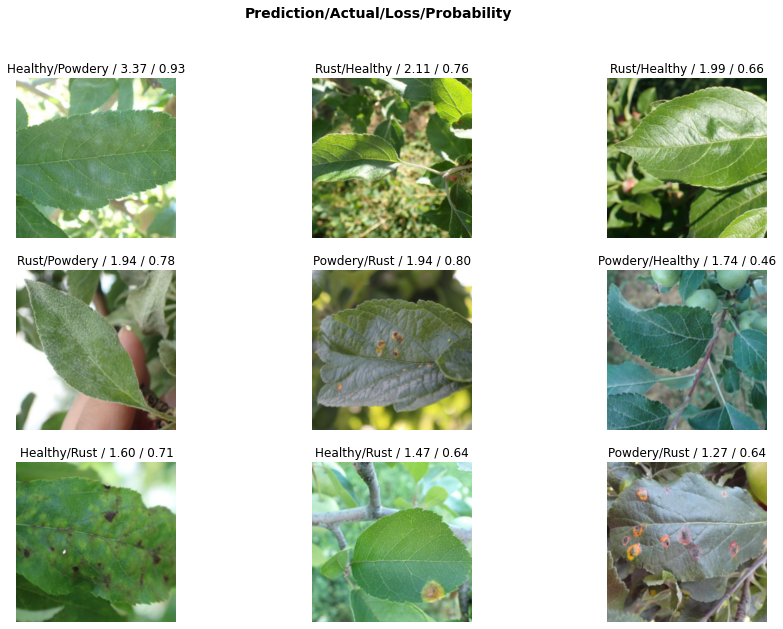

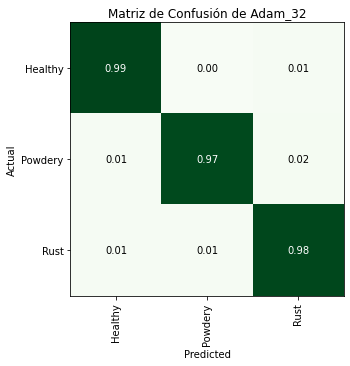

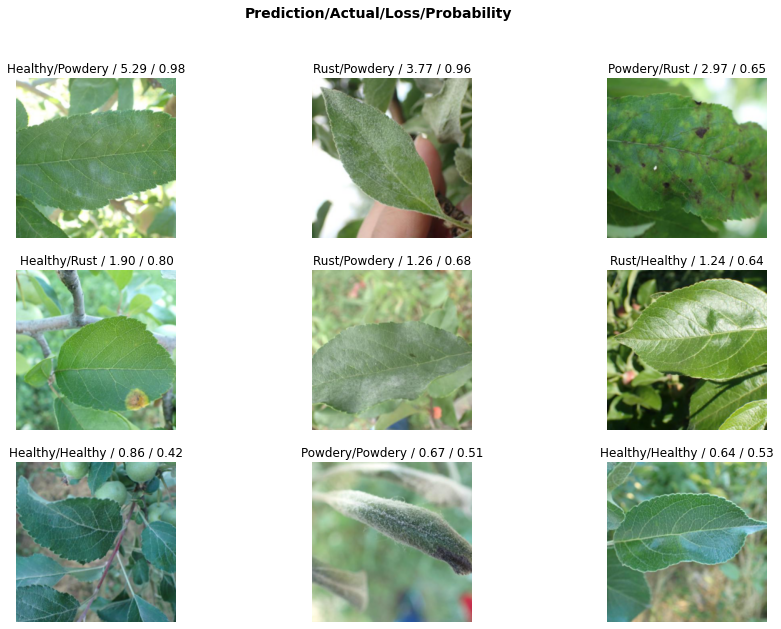

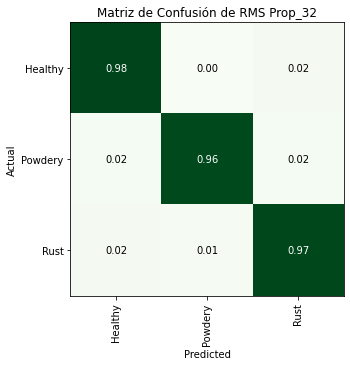

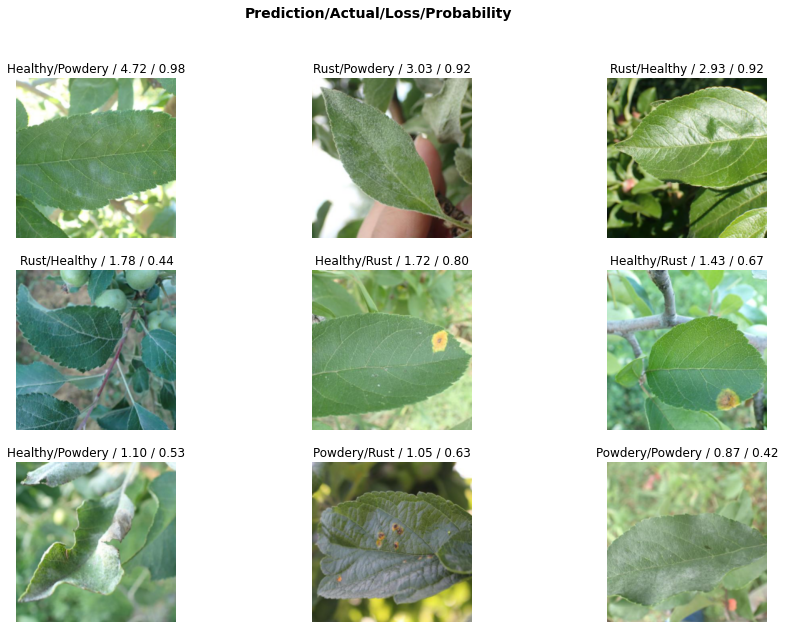

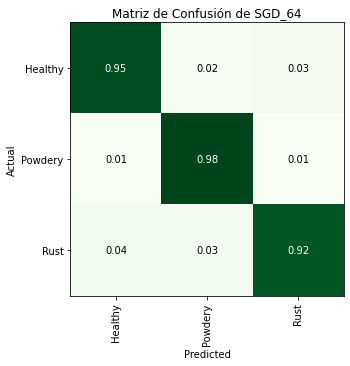

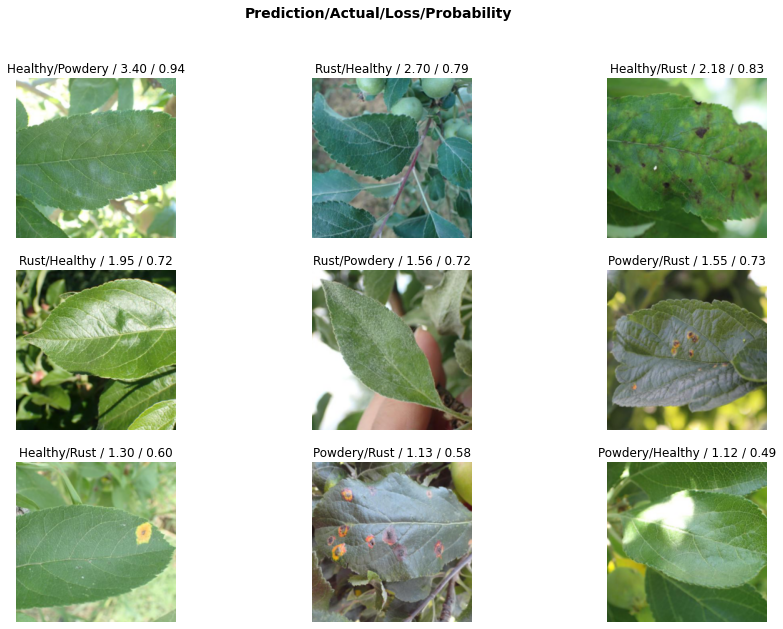

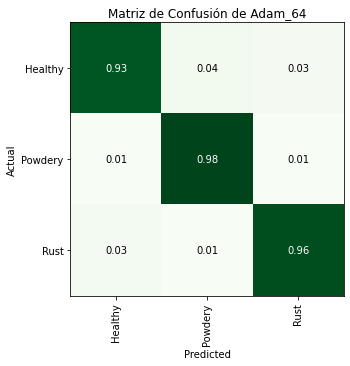

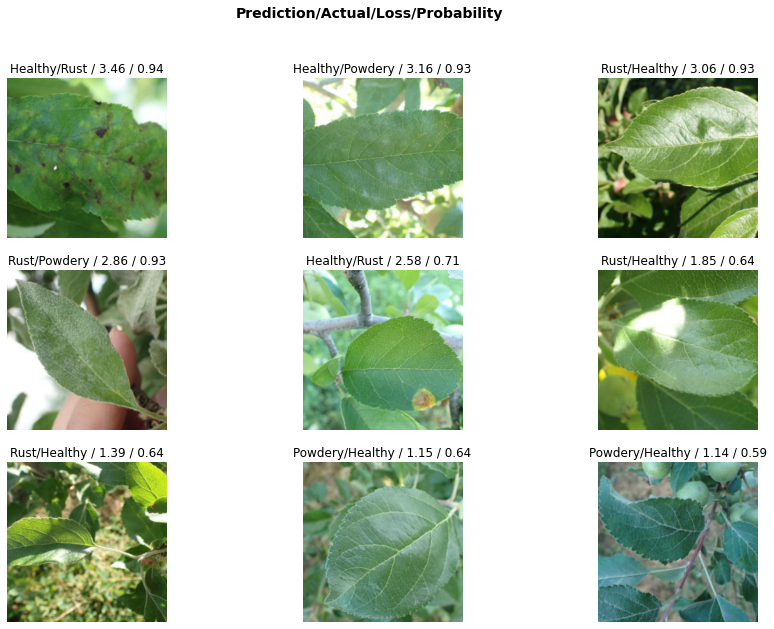

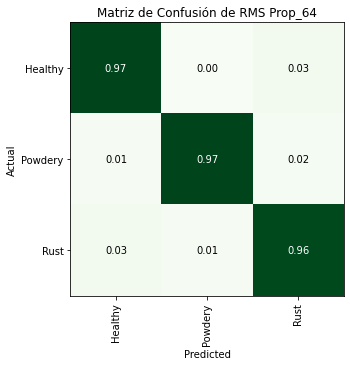

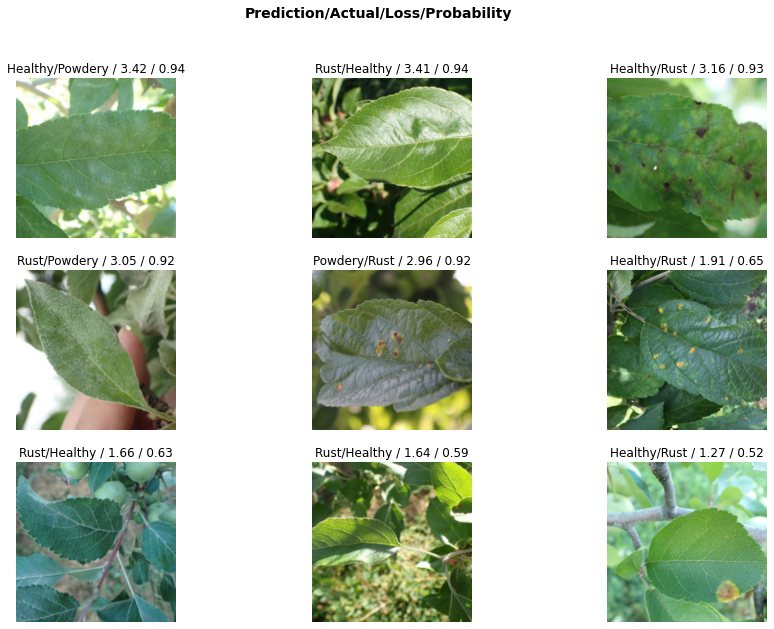

In [35]:
optimizador = ['SGD_32', 'Adam_32', 'RMS Prop_32','SGD_64', 'Adam_64', 'RMS Prop_64',]
i = 0
for learner in learners:
  learning_interpreter = ClassificationInterpretation.from_learner(learner)
  # Matriz de confusión
  learning_interpreter.plot_confusion_matrix(title = f'Matriz de Confusión de {optimizador[i]}',
                                            normalize = True,
                                            cmap = "Greens",
                                            figsize = (5, 5),)
  i += 1
  # Top losses
  try:
    learning_interpreter.plot_top_losses(9, figsize=(15,10))
  except:
    print('No es posible mostrar el "Plot Top Losses", el número de muestras es demasiado')

##3.5. Predicción

In [43]:
# Función para predecir imagen
def pred_img(img_path, learner):
  dirs = os.listdir(path)
  dirs.copy()
  dirs.sort()
  img = PILImage.create(img_path)
  pred,c,probs = learner.predict(img)
  print('-'*95)
  print(f" Predicción: {pred}.")
  print(f" Probabilidad: {probs[c].item()*100:.2f}%")
  print('-'*95)
  figura = plt.figure(figsize = (12,3))
  figura.subplots_adjust(hspace=1.5, wspace=0.5)
  grafico1 = figura.add_subplot(121)
  grafico2 = figura.add_subplot(122)
  grafico1.imshow(img)
  grafico2.bar(dirs, probs.tolist(), width=.85)
  grafico1.set_title('Visualización de la Imagen')
  grafico2.set_title('Probabilidad de clases')
  grafico2.set_ylabel('Probabilidad 0 - 1')
  grafico2.set_xlabel('Etiquetas / Clases')
  plt.show()

In [47]:
# Learners
sGD_32 = learners[0]
adam_32 = learners[1]
rMSProp_32 = learners[2]
sGD_64 = learners[3]
adam_64 = learners[4]
rMSProp_64 = learners[5]

-----------------------------------------------------------------------------------------------
 Predicción: Healthy.
 Probabilidad: 97.20%
-----------------------------------------------------------------------------------------------


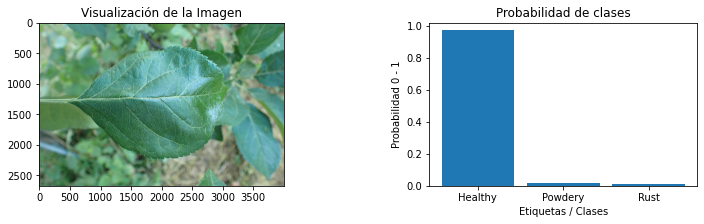

In [48]:
# Predecir una imagen en concreto
img_path = '/content/Validation/Healthy/9bdcc23296db1516.jpg'
pred_img(img_path, adam_32)

-----------------------------------------------------------------------------------------------
 Predicción: Healthy.
 Probabilidad: 94.44%
-----------------------------------------------------------------------------------------------


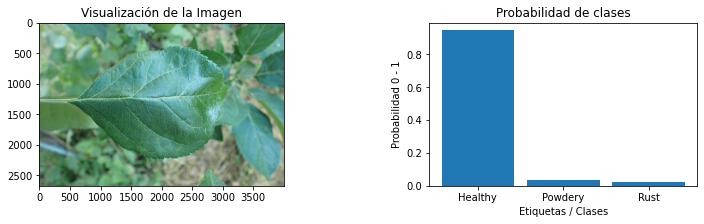

In [49]:
# Predecir una imagen en concreto
img_path = '/content/Validation/Healthy/9bdcc23296db1516.jpg'
pred_img(img_path, rMSProp_64)